<a href="https://colab.research.google.com/github/LuchiHamade/telecomChallenge_2/blob/main/Telecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv("dataset_limpio.csv")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()


Saving dataset_limpio.csv to dataset_limpio.csv
Filas: 7267, Columnas: 6


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [21]:
import pandas as pd
import ast

# --- 1- Eliminar columnas irrelevantes ---
df = df.drop(columns=['customerID'], errors='ignore')

# --- 2- Detectar y expandir columnas de diccionarios ---
cols_dic = []
for col in df.columns:
    if df[col].dtype == 'object':
        sample = df[col].dropna().astype(str).head(10)  # mirar primeras no-nulas
        if sample.apply(lambda x: x.strip().startswith('{') and x.strip().endswith('}')).any():
            cols_dic.append(col)

for col in cols_dic:
    try:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('{') else x)
        df_expand = df[col].apply(pd.Series)
        df_expand = df_expand.add_prefix(f"{col}_")
        df = pd.concat([df.drop(columns=[col]), df_expand], axis=1)
    except Exception as e:
        print(f"⚠️ No se pudo expandir la columna {col}: {e}")

# --- 3- Convertir Yes/No a 1/0 ---
for col in df.select_dtypes(include='object').columns:
    uniques = set(df[col].dropna().unique())
    if uniques.issubset({'Yes','No','Yes ','No '}):  # permitimos espacios
        df[col] = df[col].str.strip().map({'Yes':1, 'No':0})

# --- 3b- Forzar limpieza especial de la columna target Churn ---
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].astype(str).str.strip().map({'Yes':1, 'No':0})
    print("✅ Columna 'Churn' convertida a 0/1 sin errores")

# --- 4- One-Hot Encoding ---
cat_cols = [col for col in df.select_dtypes(include='object').columns
            if not df[col].dropna().apply(lambda x: isinstance(x, dict)).any()]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --- 5- Rellenar nulos ---
df = df.fillna(0)

# --- 6- Resumen final ---
print(" Dataset final listo para modelado:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")



✅ Columna 'Churn' convertida a 0/1 sin errores
 Dataset final listo para modelado:
Filas: 7267, Columnas: 6560


In [ ]:
import pandas as pd

# 1- Detectar columnas categóricas (tipo object) que no sean diccionarios
cat_cols = [col for col in df.select_dtypes(include='object').columns
            if not df[col].dropna().apply(lambda x: isinstance(x, dict)).any()]

# 2- Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 3- Rellenar posibles nulos (por seguridad)
df_encoded = df_encoded.fillna(0)

# 4- Ver resultado
print("Dataset transformado a formato numérico:")
print(f"Filas: {df_encoded.shape[0]}, Columnas: {df_encoded.shape[1]}")
df_encoded.head()

Dataset transformado a formato numérico:
Filas: 7267, Columnas: 30


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges,customer_gender_Male,phone_MultipleLines_No phone service,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,1,"{'Monthly': 65.6, 'Total': '593.3'}",False,False,...,True,False,True,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,0,"{'Monthly': 59.9, 'Total': '542.4'}",True,False,...,False,False,False,False,True,False,False,False,False,True
2,1.0,0,0,0,4,1,1,"{'Monthly': 73.9, 'Total': '280.85'}",True,False,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,0,13,1,1,"{'Monthly': 98.0, 'Total': '1237.85'}",True,False,...,False,False,True,False,True,False,False,False,True,False
4,1.0,1,1,0,3,1,1,"{'Monthly': 83.9, 'Total': '267.4'}",False,False,...,True,False,True,False,False,False,False,False,False,True


Conteo de cada clase:
Churn
0.0    5398
1.0    1869
Name: count, dtype: int64

Proporción de cada clase:
Churn
0.0    0.74281
1.0    0.25719
Name: proportion, dtype: float64


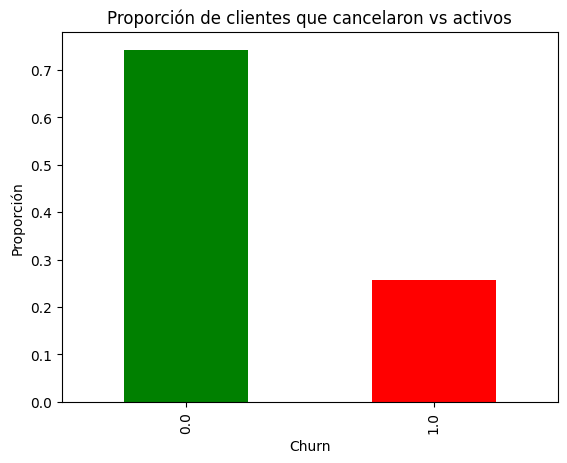

In [ ]:
# Contar ocurrencias de cada clase
conteo_churn = df['Churn'].value_counts()

# Calcular proporción de cada clase
proporcion_churn = df['Churn'].value_counts(normalize=True)

print("Conteo de cada clase:")
print(conteo_churn)
print("\nProporción de cada clase:")
print(proporcion_churn)

# Visualización opcional con gráfico
import matplotlib.pyplot as plt

proporcion_churn.plot(kind='bar', color=['green','red'])
plt.title('Proporción de clientes que cancelaron vs activos')
plt.ylabel('Proporción')
plt.show()

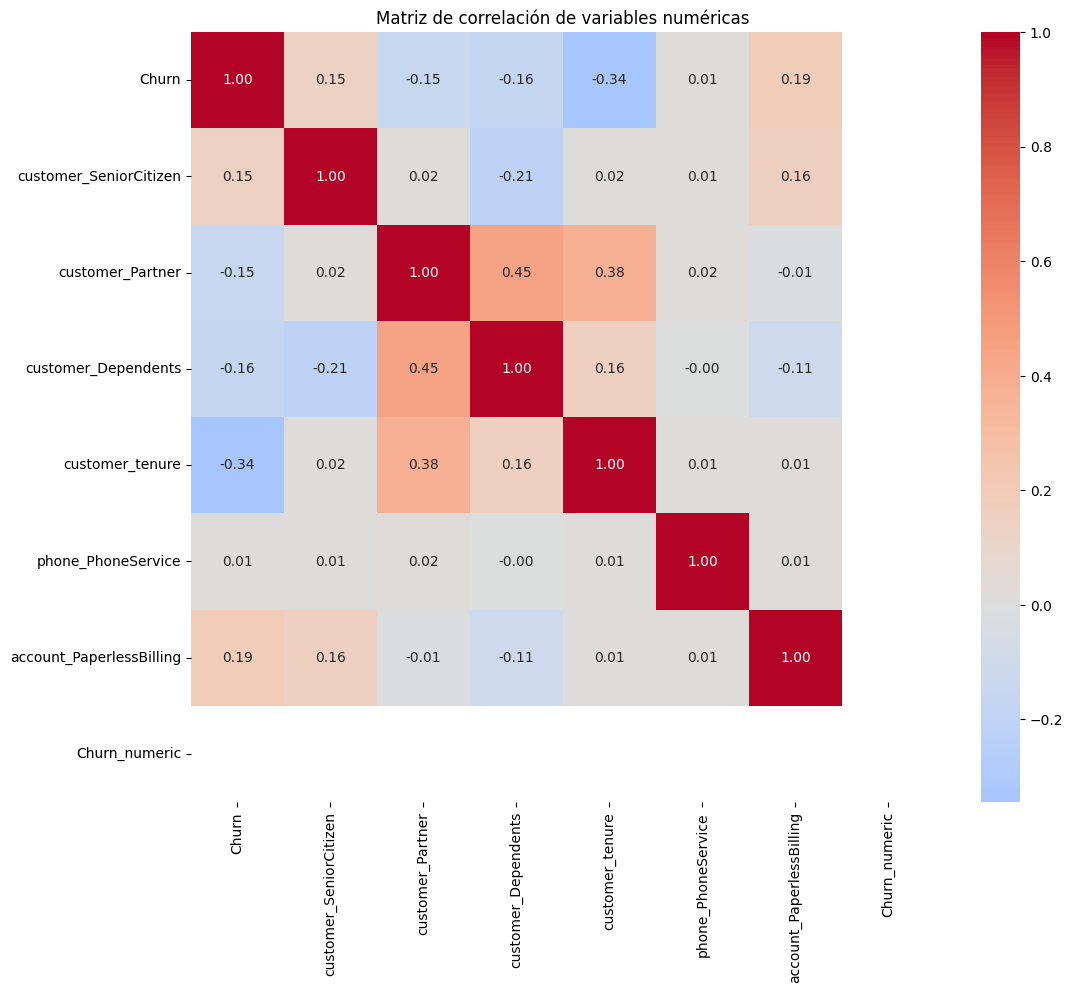

In [ ]:
# Convertir Churn a 0/1 si aún no se hizo
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Seleccionar solo variables numéricas
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Calcular matriz de correlación
corr_matrix = df[num_cols].corr()

# Visualizar la matriz con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.show()